 20%|████████▊                                   | 3/15 [00:09<00:36,  3.00s/it]


KeyboardInterrupt: 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

import seaborn as sr
import mne
import pickle
from tqdm import tqdm
import pywt
from skimage.restoration import denoise_wavelet

## Step 1: Loading the data

In [23]:
path = "/media/kashraf/Elements/seizure_detection/preprocessed/v1.5.2/EEG+Annoatations/training/seizure_types/absz/00001113_s002_t001_250.0_absz_1.npy"
# data =pickle.load(open(path,"rb"))
data =np.load(path)

(19, 176)

/usr/local/lib/python3.8/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


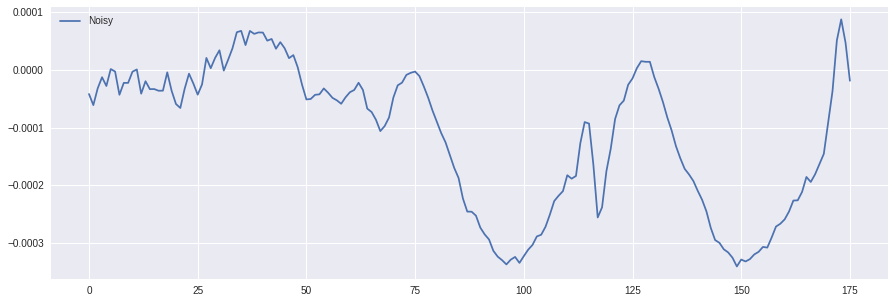

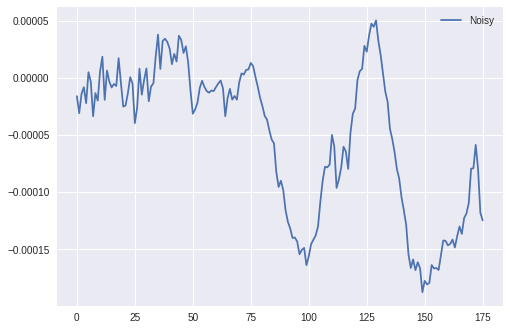

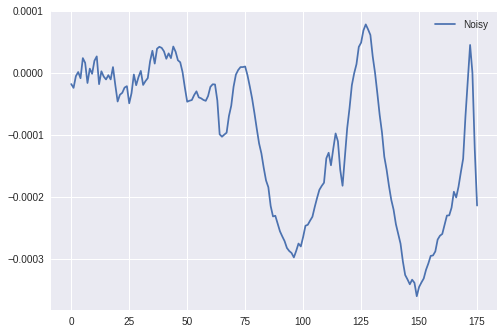

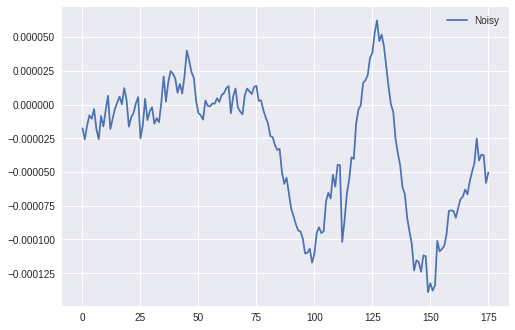

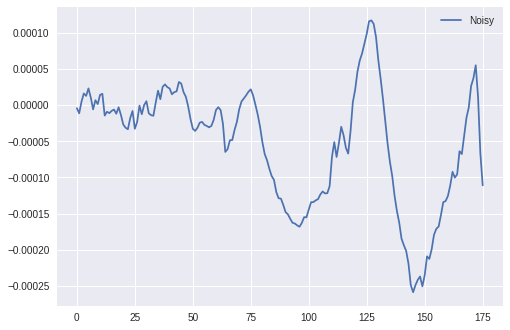

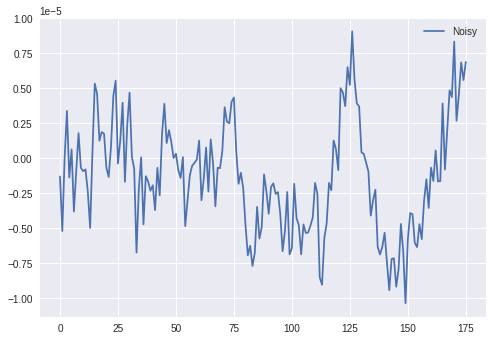

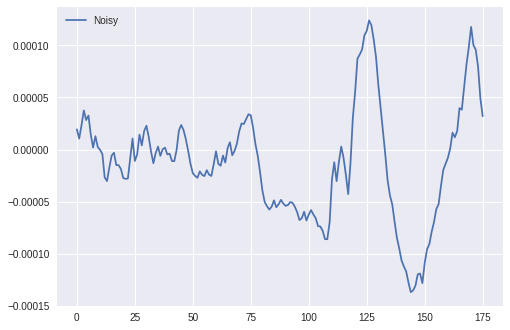

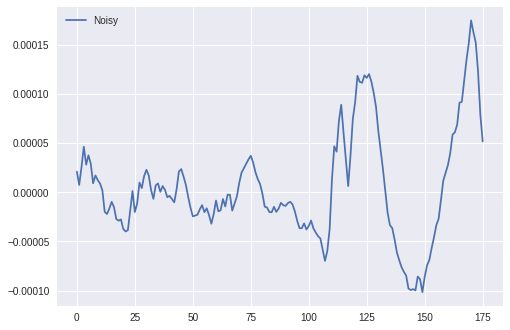

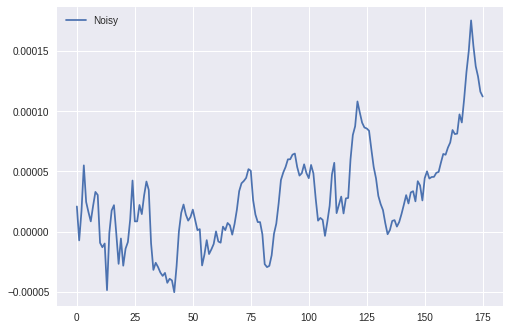

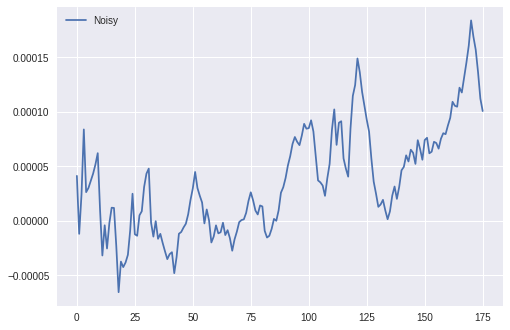

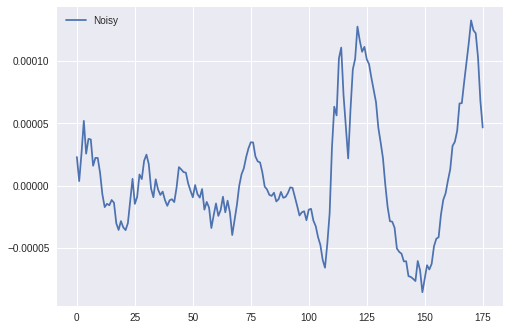

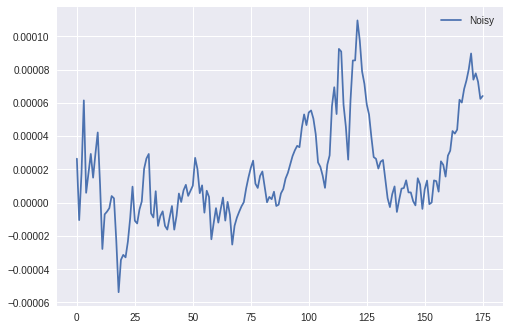

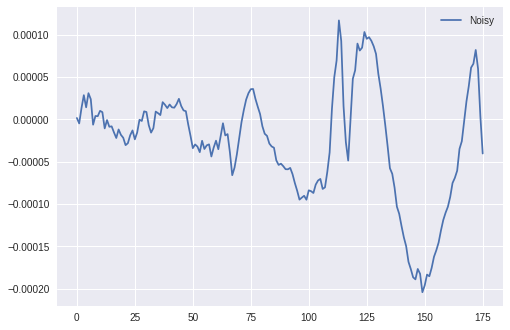

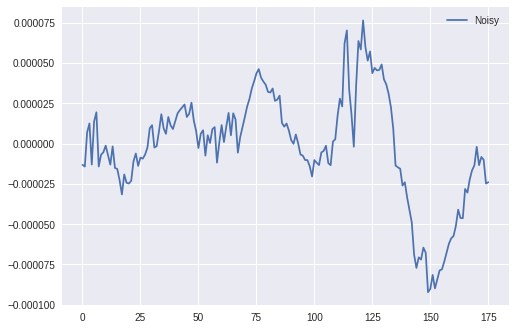

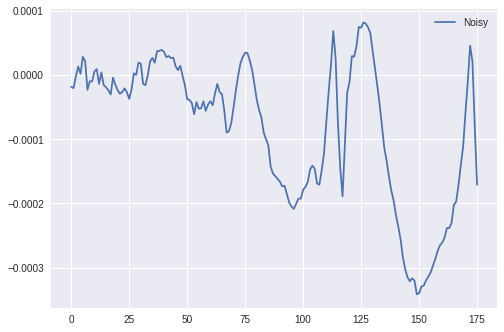

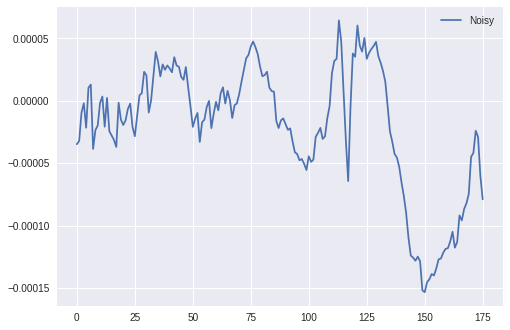

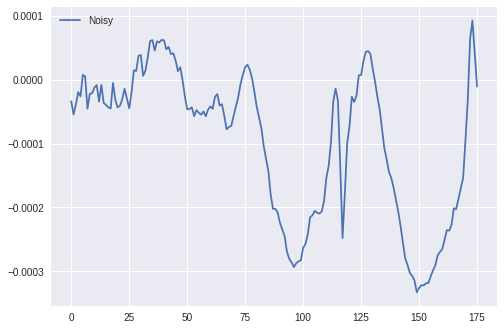

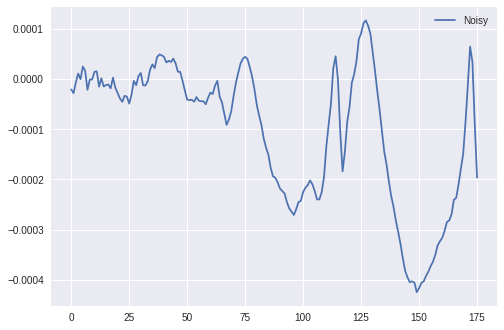

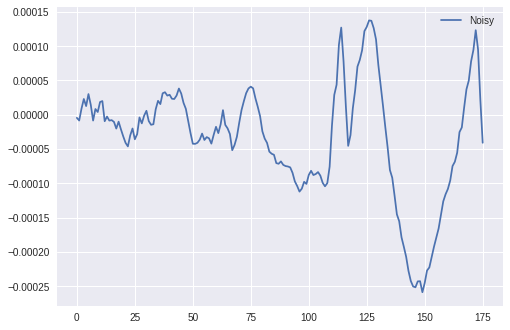

In [36]:
plt.style.use("seaborn")
plt.figure(figsize=(15,5))
test_data = data
# for data1 in test_data:
#     max_level=4
x_denoised = denoise_wavelet(test_data,method='BayesShrink',
                             mode='soft', wavelet_levels=3, wavelet="sym8")
#     print(wt)
for i in range(data.shape[0]):
#     plt.plot(data[i])
    plt.plot(x_denoised[i])
    plt.legend(["Noisy","Denoised"])

    #     plt.title(wt)
    plt.show()

In [7]:
test_data[0].shape

(176,)

maximum level is 4


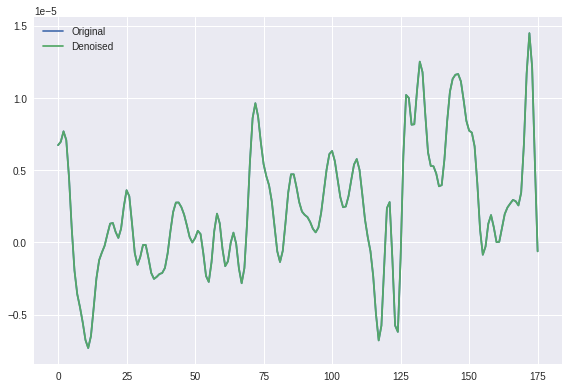

In [18]:
import matplotlib.pyplot as plt
import pywt
import sys

# Data format:
# Raw data should be in a .txt file with two columns, separated by tabs:
#  - The first column should be a time-series index
#  - The second column should contain the data to be filtered
data=test_data[0]

# # Get data:
# file_object  = open('./Biosignals.txt', 'r')
# raw_data = file_object.readlines()
# index = []
# data = []
# # for i in range(len(raw_data)-1):
#     x, y = raw_data[i].split('\t')
#     X = float(x)
#     Y = float(y)
#     index.append(X)
#     data.append(Y)

# Create wavelet object and define parameters
w = pywt.Wavelet('sym4')
maxlev = pywt.dwt_max_level(data.shape[0], w.dec_len)
# maxlev = 2 # Override if desired
print("maximum level is " + str(maxlev))
threshold =1 # Threshold for filtering

# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(data, 'sym8', level=3)

#cA = pywt.threshold(cA, threshold*max(cA))
# plt.figure()
# for i in range(1, len(coeffs)):
#     plt.subplot(maxlev, 1, i)
#     plt.plot(coeffs[i])
#     coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
#     plt.plot(coeffs[i])


datarec = pywt.waverec(coeffs, 'sym8')


# mintime = 1000
# maxtime = mintime + 2000

# plt.figure()
# plt.subplot(2, 1, 1)
# plt.plot(data)
# plt.xlabel('time (s)')
# plt.ylabel('microvolts (uV)')
# plt.title("Raw signal")
# plt.subplot(2, 1, 2)
# plt.plot(datarec)
# plt.xlabel('time (s)')
# plt.ylabel('microvolts (uV)')
# plt.title("De-noised signal using wavelet techniques")
plt.plot(data)
plt.plot(datarec)
plt.legend(["Original","Denoised"])

plt.tight_layout()
plt.show()

# fs = 500
# f, t, Sxx = signal.spectrogram(data, fs)
# plt.pcolormesh(t, f, Sxx)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.ylim(0, 50)
# plt.show()


## Step2:  Denoising

In [62]:
test_data.shape

(64, 176)

## Step 3: Analysis of denoising results

## Step 4: Saving the denoised data 